# Отчет по домашней работе по АОТ #1

### Задание E (язык программирования python3)

Подключим все необходимые модули. pymorphy для морфологического анализа. re для удобства. Pandas и matplotlib для простой визуализации.

In [1]:
import pymorphy2
from pymorphy2 import tokenizers
import re
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

In [2]:
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)

Откроем файл с текстом 2 главы "Алисы в стране чудес"

In [3]:
with open('alice2.txt', 'r') as file:
    alice_text = file.read()

Зададим список символов, не являющихся частями речи. Отфильтруем с помощью него токены.

In [4]:
ignore_symbs = [',', '-', ':', '!', ';', '(', ')', '–', '"', '{', '}', '[', ']', '.', '?']

In [5]:
tokens = pymorphy2.tokenizers.simple_word_tokenize(alice_text)

In [6]:
filtered_tokens = list(filter(lambda x: x not in ignore_symbs, tokens))

Посчитаем число различных словоформ и запомним

In [7]:
word_forms = {} # этот словарь хранит уникальные слова и считает их количество в тексте
for token in filtered_tokens:
    if word_forms.get(token) == None:
        word_forms[token] = 0
    word_forms[token] += 1

word_forms_count = len(word_forms.keys()) 

Теперь посчитаем среднюю длину предложений и запомним.

In [8]:
statements_list = re.split(r'(?<=\w[.!?]) ', alice_text)
syms_sum = 0
for statement in statements_list:
    syms_sum += len(statement)

average_len = syms_sum/len(statements_list) 

Создадим объект-экземпляр морфологического анализатора

In [9]:
morph = pymorphy2.MorphAnalyzer()

Будем парсить токены текста и считать статистики

Но сначала зададим необходимые счетчики

In [10]:
parts_of_speech = {}
noun_adj_cases = {}
verb_nums = {'sing': 0, 'plur': 0}
verb_times = {}
verb_pers = {}
lemms = {}

In [11]:
for token in filtered_tokens:
    parsed = morph.parse(token)
    # запоминаем часть речи и обновляем счетчик
    parsed_POS = parsed[0].tag.POS
    if parts_of_speech.get(parsed_POS) == None:
        parts_of_speech[parsed_POS] = 0
    parts_of_speech[parsed_POS] += 1            
    # если существительное или полное прилагательное, то запоминаем падеж и обновляем счетчик
    if parsed_POS == 'NOUN' or parsed_POS == 'ADJF':
        parsed_case = parsed[0].tag.case
        
        if noun_adj_cases.get(parsed_case) == None:
            noun_adj_cases[parsed_case] = 0
        noun_adj_cases[parsed_case] += 1           
    
    # морфологические формы глагола
    if parsed_POS == 'VERB':
        verb_num = parsed[0].tag.number
        verb_nums[verb_num] += 1           
        
        v_time = parsed[0].tag.tense
        if verb_times.get(v_time) == None:
            verb_times[v_time] = 0
        verb_times[v_time] += 1
        
        v_pers = parsed[0].tag.person
        if verb_pers.get(v_pers) == None:
            verb_pers[v_pers] = 0
        verb_pers[v_pers] += 1
    
    # уникальные леммы
    normal_form = parsed[0].normal_form
    if lemms.get(normal_form) == None:
        lemms[normal_form] = 0
    lemms[normal_form] += 1                    
    

    

### Посмотрим на получившиеся статистики

In [12]:
print('Число различных словоформ в тексте: {}'.format(word_forms_count))

Число различных словоформ в тексте: 1036


In [13]:
print('Средняя длина предложения: {}'.format(average_len))

Средняя длина предложения: 129.31428571428572


Части речи в тексте

In [14]:
parts_df = pd.Series(parts_of_speech)
print('Проценты разных частей речи:')
print((parts_df/parts_df.sum() * 100))

Проценты разных частей речи:
PRTS     0.187354
INTJ     0.889930
PREP     7.400468
VERB    15.362998
PRTF     0.140515
ADJS     0.702576
NUMR     0.468384
ADVB     9.742389
PRED     0.421546
GRND     0.468384
COMP     0.796253
NPRO    10.444965
CONJ    13.395785
NaN      0.515222
NOUN    18.126464
ADJF     9.039813
INFN     3.185012
PRCL     8.711944
dtype: float64


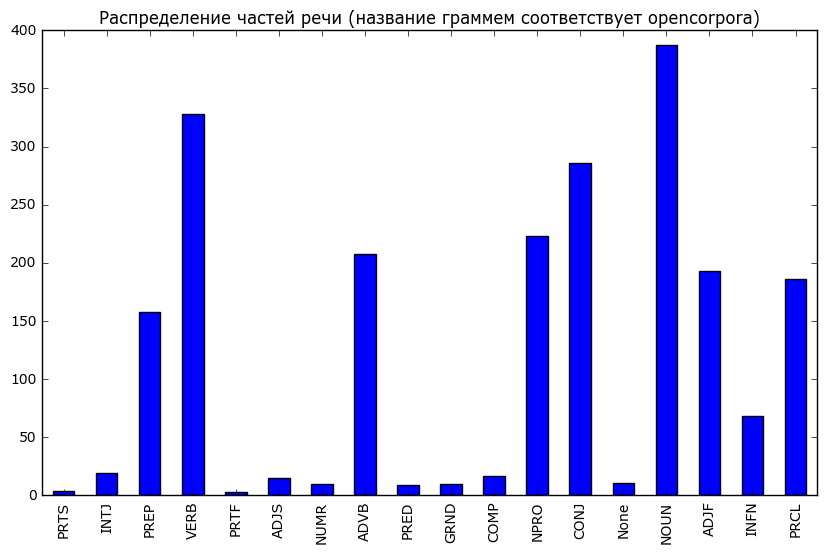

In [15]:
pd.Series(parts_of_speech).plot(kind='bar', figsize=(10,6))
plt.title('Распределение частей речи (название граммем соответствует opencorpora)')
plt.show()

Падежи существительных и прилагательных

In [16]:
print('Относительные частоты падежей:')
cases_df = pd.Series(noun_adj_cases)
print((cases_df/cases_df.sum()))

Относительные частоты падежей:
ablt    0.070690
accs    0.148276
datv    0.060345
gen2    0.001724
gent    0.205172
loct    0.074138
nomn    0.436207
voct    0.003448
dtype: float64


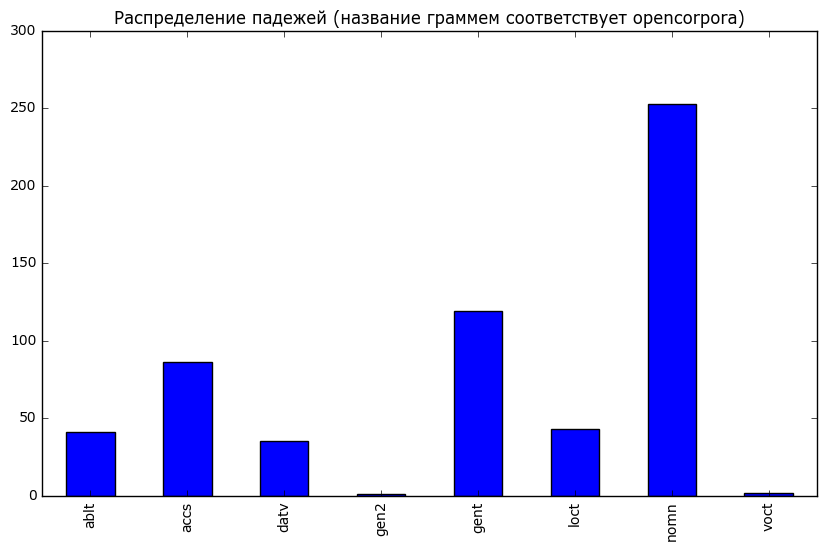

In [17]:
pd.Series(noun_adj_cases).plot(kind='bar', figsize=(10,6))
plt.title('Распределение падежей (название граммем соответствует opencorpora)')
plt.show()

Морфологические формы глагола

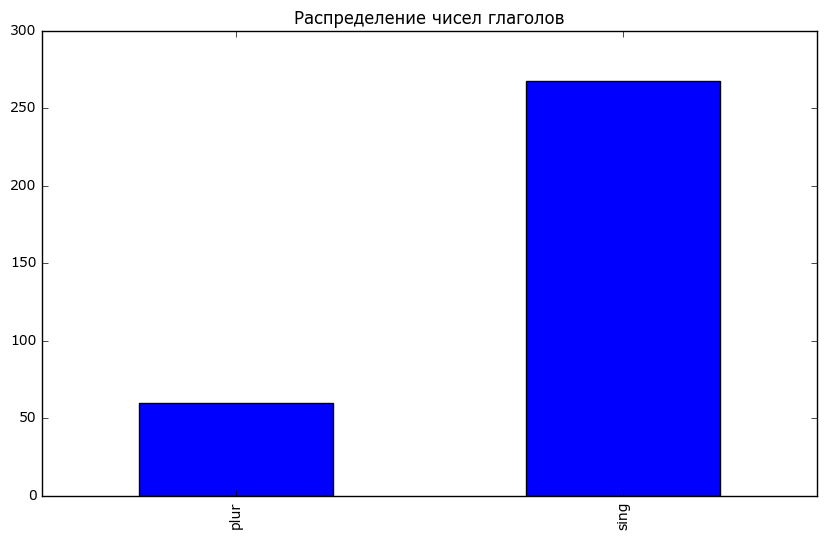

In [18]:
pd.Series(verb_nums).plot(kind='bar', figsize=(10, 6))
plt.title('Распределение чисел глаголов')
plt.show()

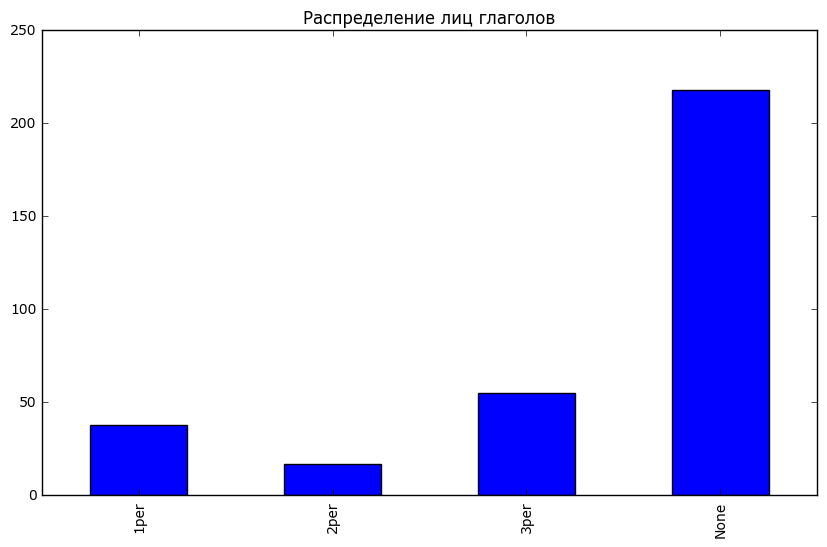

In [19]:
pd.Series(verb_pers).plot(kind='bar', figsize=(10,6))
plt.title('Распределение лиц глаголов')
plt.show()

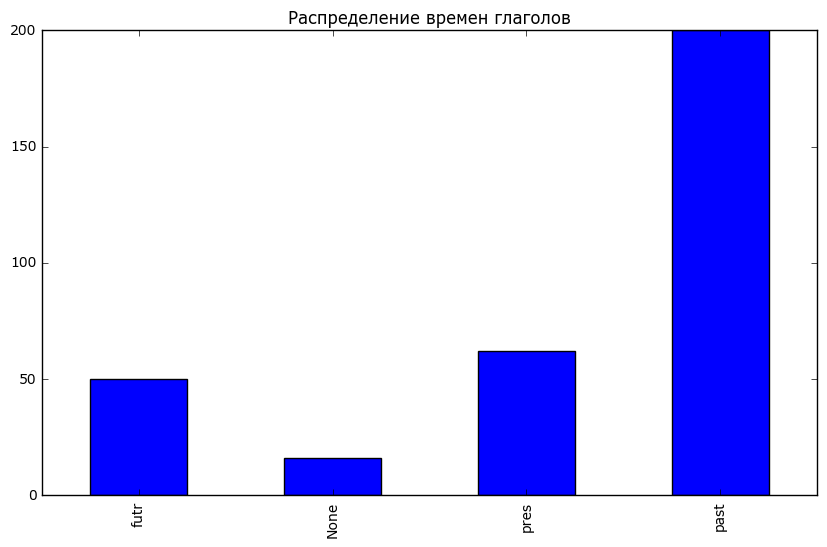

In [20]:
pd.Series(verb_times).plot(kind='bar', figsize=(10,6))
plt.title('Распределение времен глаголов')
plt.show()

Леммы

In [21]:
print('Количество уникальных лемм: {}'.format(len(list(lemms.keys()))))

Количество уникальных лемм: 811


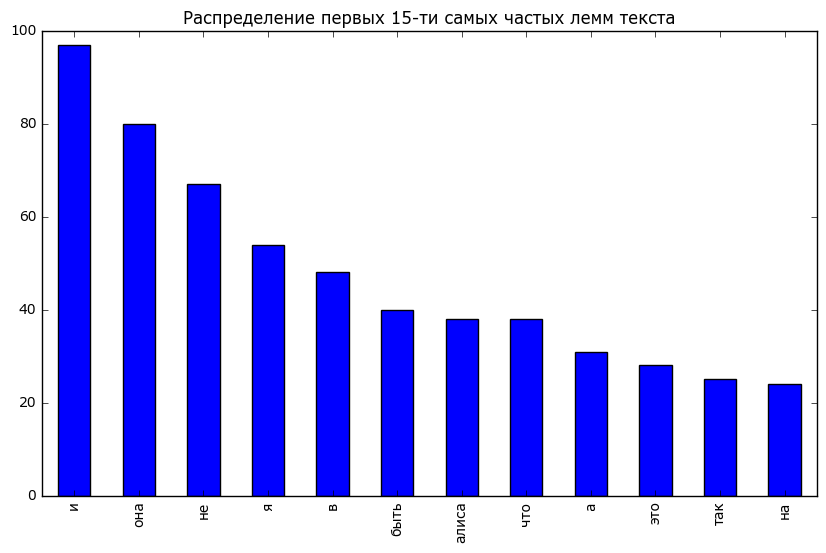

In [22]:
pd.Series(lemms).sort_values(ascending=False).ix[:12].plot(kind='bar', figsize=(10,6))
plt.title('Распределение первых 15-ти самых частых лемм текста')
plt.show()

Самые частотные слова

In [23]:
froms_df = pd.Series(word_forms)
print('Относительные частоты самых частотных слов:')
print((froms_df.sort_values(ascending=False)/froms_df.sum()).ix[:10])

Относительные частоты самых частотных слов:
и        0.039813
не       0.029508
она      0.023888
в        0.020141
я        0.017799
Алиса    0.017330
что      0.016862
так      0.011710
на       0.011241
а        0.010304
dtype: float64


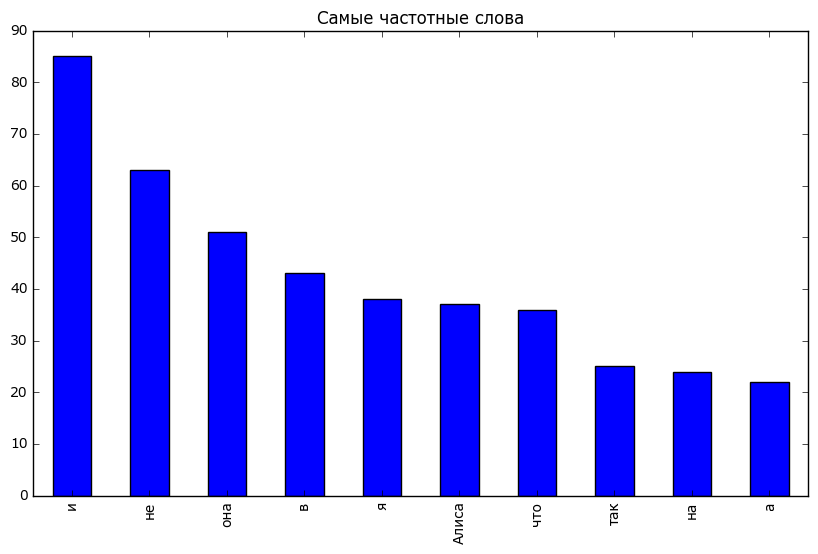

In [24]:
froms_df.sort_values(ascending=False).ix[:10].plot(kind='bar', figsize=(10,6))
plt.title('Самые частотные слова')
plt.show()